# Spam Classification using Naive Bayes and NLP
We use text analysis and a database of labelled mail and spam mail to train a Naive Bayes classifier to recognise SPAM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn')

import seaborn as sn
%matplotlib inline

## Simple Example of NLP

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(min_df=1)

In [9]:
docs = np.array(["EDHEC is the best business school in the world", "Machine learning is cool", "EDHEC teaches Machine Learning"])
# Find the bag of words in the corpus
count.fit(docs)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
print(count.vocabulary_)

{'edhec': 3, 'is': 5, 'the': 10, 'best': 0, 'business': 1, 'school': 8, 'in': 4, 'world': 11, 'machine': 7, 'learning': 6, 'cool': 2, 'teaches': 9}


In [11]:
bag = count.transform(docs)
print(bag.toarray())

[[1 1 0 1 1 1 0 0 1 0 2 1]
 [0 0 1 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 1 0 0]]


### Loading the Training Emails into a DataFrame
The purpose of this is to load all the emails into a program that counts the word frequency for all of the words across all of the emails in the training set. 

In [2]:
train_dir = './data/spamdetector/train-mails'

In [3]:
def makeEmailDataframe(train_dir):
        
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]    
    rows = []
    
    for mail in emails:    
        
        classification = 'ham'
        
        if mail.find('spmsg') > 0:
            classification = 'spam'
        
        with open(mail) as m:
            txt = ''
            for line in m:
                txt += line
            
            length = len(txt)
            
        rows.append({'filename': mail, 'length': length, 'text':txt, 'class':classification})
    
    data_frame = pd.DataFrame(rows)
    
    return data_frame

In [4]:
X_train = makeEmailDataframe(train_dir)

In [5]:
X_train.shape

(702, 4)

In [6]:
X_train.head(10)

,class,filename,length,text
0,ham,./data/spamdetector/train-mails\3-1msg1.txt,728,Subject: re : 2 . 882 s - > np np\n\n> deat : ...
1,ham,./data/spamdetector/train-mails\3-1msg2.txt,424,Subject: s - > np + np\n\ndiscussion s - > np ...
2,ham,./data/spamdetector/train-mails\3-1msg3.txt,111,Subject: 2 . 882 s - > np np\n\n. . . 's much ...
3,ham,./data/spamdetector/train-mails\3-375msg1.txt,6364,"Subject: gent conference\n\n"" listserv "" inter..."
4,ham,./data/spamdetector/train-mails\3-378msg1.txt,181,Subject: query : causative korean\n\nanyone po...
5,ham,./data/spamdetector/train-mails\3-378msg2.txt,735,Subject: l2 learn / cultural empathy\n\ngradua...
6,ham,./data/spamdetector/train-mails\3-378msg3.txt,278,Subject: psycholinguistic teach\n\nundergradua...
7,ham,./data/spamdetector/train-mails\3-378msg4.txt,122,Subject: german corpora\n\non-line corpus mode...
8,ham,./data/spamdetector/train-mails\3-378msg5.txt,323,"Subject: t\n\nhi , help ! design experiment ma..."
9,ham,./data/spamdetector/train-mails\3-379msg1.txt,674,Subject: job - university utah\n\nlinguistic p...


In [7]:
# Let us examine a HAM email 
row = 140
print(X_train.text[row])
print("Class is:",X_train['class'][row])

Subject: * * * correction hellenistic greek announcement

couple day ago send fyi hellenistic greek linguistic resource . yet send , able correct url http : / / tartarus . uwa . edu . au / hgrk : http : / / www . uwa . edu . au / hgrk many thanks . jame k . tauber ( jtauber @ tartarus . uwa . edu . au ) 4th honour student , centre linguistic university western australium , wa 6009 , australia

Class is: ham


In [8]:
# Let us examine a SPAM email 
row = 655
print(X_train.text[row])
print("Class is:",X_train['class'][row])

Subject: save hundred restaurant , groceries airline

double coupon books ! - - $ 40 - - low one purchase follow : $ 500 grocery coupon book $ 300 fast food restaurant coupon = top name place first market ! program : * simple ! * easy ! * easy duplicate ! * affordable ! - - check - - complimentary $ 500 airline discount coupon book book arrive day order coupon redeemable participate retailer . fax - - demand : ( 619 ) 622-0073 ext . 1116-01 # 2 # information contain website request information ask question information hotline ( 916 ) 486-5580

Class is: spam


In [9]:
X_train.head()

,class,filename,length,text
0,ham,./data/spamdetector/train-mails\3-1msg1.txt,728,Subject: re : 2 . 882 s - > np np\n\n> deat : ...
1,ham,./data/spamdetector/train-mails\3-1msg2.txt,424,Subject: s - > np + np\n\ndiscussion s - > np ...
2,ham,./data/spamdetector/train-mails\3-1msg3.txt,111,Subject: 2 . 882 s - > np np\n\n. . . 's much ...
3,ham,./data/spamdetector/train-mails\3-375msg1.txt,6364,"Subject: gent conference\n\n"" listserv "" inter..."
4,ham,./data/spamdetector/train-mails\3-378msg1.txt,181,Subject: query : causative korean\n\nanyone po...


In [10]:
X_train.tail()

,class,filename,length,text
697,spam,./data/spamdetector/train-mails\spmsgc5.txt,697,"Subject: vote # 1 online business\n\nhi , drop..."
698,spam,./data/spamdetector/train-mails\spmsgc6.txt,560,"Subject: read ! !\n\ndream ? member our team ,..."
699,spam,./data/spamdetector/train-mails\spmsgc7.txt,582,Subject: search . . . credibility ! ! !\n\ndre...
700,spam,./data/spamdetector/train-mails\spmsgc8.txt,1030,Subject: financial freedom while sleep\n\ndear...
701,spam,./data/spamdetector/train-mails\spmsgc9.txt,413,Subject: re : major acquisition !\n\ncompany :...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002658DBA9A20>,
      dtype=object)

<Figure size 720x432 with 0 Axes>

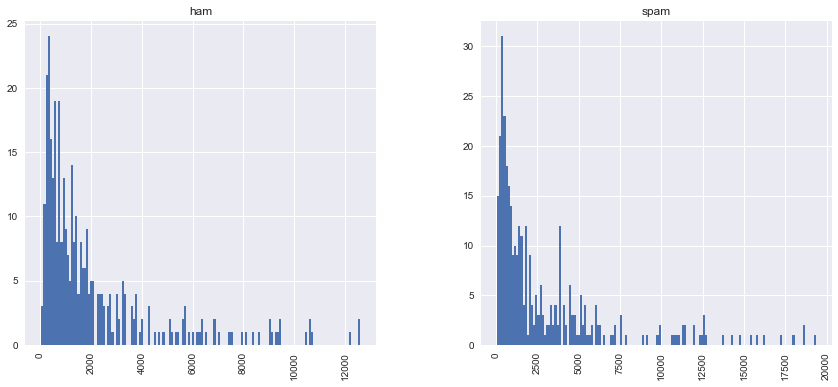

In [11]:
# Examine length of Spam vs Ham Emails 
plt.figure(figsize=(10,6)) 

X_train.hist(column="length", by = "class", bins=150, figsize = (14,6))

Seem to be some really long messages. Distribution looks quite natural. Nothing significantly different between spam and non-spam.

### Load Stop Words

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dominic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
print(stopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Create Bag of Words from Emails

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# Set up the count vectorizer 
train_count = CountVectorizer(min_df=1, stop_words = stopWords)

In [16]:
# Teach it all of the emails, both SPAM and HAM
train_count.fit(X_train['text'].values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',... 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
# Examine its vocabulary 
len(train_count.vocabulary_)

19573

In [18]:
train_count.vocabulary_

{'subject': 16984,
 '882': 1843,
 'np': 12983,
 'deat': 5856,
 'sun': 17085,
 '15': 326,
 'dec': 5869,
 '91': 1898,
 '25': 714,
 'est': 7192,
 'michael': 12031,
 'mmorse': 12207,
 'vm1': 18815,
 'yorku': 19453,
 'ca': 4218,
 '864': 1821,
 'query': 14706,
 'wlodek': 19217,
 'zadrozny': 19490,
 'ask': 3100,
 'anything': 2869,
 'interest': 9913,
 'construction': 5300,
 'second': 15877,
 'much': 12437,
 'relate': 15067,
 'consider': 5272,
 'form': 7883,
 'discuss': 6329,
 'list': 11244,
 'late': 10898,
 'reduplication': 14973,
 'logical': 11322,
 'sense': 15972,
 'john': 10318,
 'mcnamara': 11851,
 'name': 12560,
 'tautologous': 17385,
 'thus': 17674,
 'level': 11071,
 'indistinguishable': 9667,
 'support': 17120,
 'logic': 11320,
 'base': 3461,
 'semantics': 15947,
 'irrelevant': 10066,
 'natural': 12598,
 'language': 10860,
 'supplies': 17117,
 'value': 18591,
 'attribute': 3206,
 'follow': 7841,
 'fact': 7497,
 'relevant': 15088,
 'entity': 7067,
 'chaim': 4556,
 'shmendrik': 16152,
 'f

In [19]:
# We can examine all the feature words which have been ordered alphabetically 
print(train_count.get_feature_names())

['00', '000', '000bp', '0031', '00333', '0037', '0057', '0073', '0074', '00919680', '00am', '00pm', '00uzheb', '01', '0106', '0108', '011', '0118', '0139', '013953', '013a', '014863', '014893', '015491', '015509', '01701', '01bd8356', '01in', '02', '0244', '02814', '02816', '0293', '02osine', '0306', '0312', '0342', '0343', '0363', '0371', '03901', '04', '0442', '04627caa', '047mdrelrp11', '04g', '05', '0521', '0536088', '0615', '0621', '0623', '0633', '0642', '06483', '0657', '0685', '07083', '0796', '07974', '08', '080', '08015', '08017', '08028', '08080', '0811', '0814', '0821', '08402', '0845', '0856', '08619', '0870', '08700', '08848', '0885', '08903', '0897', '09', '0900', '090029hst', '0909', '091', '09107', '092', '0959358', '0987', '0989', '0990', '0994', '0b', '0in', '10', '100', '1000', '10000', '100000', '100064', '1001', '10010', '100101', '10011', '10019', '10036', '1007', '1009', '100k', '100khz', '100mb', '100mg', '100mhz', '100pf', '100x', '101', '1010', '1011', '10131

In [20]:
bag = train_count.transform(X_train['text'].values)

In [21]:
# There is a row for each email and one for every word in the vocabulary labelled with a 1 if it is present
bag.toarray().shape

(702, 19573)

In [22]:
np.sum(bag.toarray() > 0)/np.sum(bag.toarray() > -1)*100

0.8047818066721658

In [23]:
bag.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Example Message

In [24]:
numWords = bag.toarray().shape[1]

This is the email

Subject: * * * correction hellenistic greek announcement

couple day ago send fyi hellenistic greek linguistic resource . yet send , able correct url http : / / tartarus . uwa . edu . au / hgrk : http : / / www . uwa . edu . au / hgrk many thanks . jame k . tauber ( jtauber @ tartarus . uwa . edu . au ) 4th honour student , centre linguistic university western australium , wa 6009 , australia

In [25]:
# And we see its representation in the bag of words - SLOOWWWW
email = 140
if 1==0: 
    for i in range(0,numWords):
        v = bag.toarray()[email][i]
        if v != 0:
            print(i, v, train_count.get_feature_names()[i])

## Train Classifier

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
classifier = MultinomialNB()

In [28]:
train_targets = X_train['class'].values

In [29]:
classifier.fit(bag,train_targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Testing the Classifier

In [30]:
test_dir = './data/spamdetector/test-mails'

In [31]:
X_test = makeEmailDataframe(test_dir)

In [32]:
X_test.head()

,class,filename,length,text
0,ham,./data/spamdetector/test-mails\8-899msg1.txt,2949,Subject: book : phonetic / speech production\n...
1,ham,./data/spamdetector/test-mails\8-900msg1.txt,1204,Subject: book : syntax\n\nsusanne winkler focu...
2,ham,./data/spamdetector/test-mails\8-901msg1.txt,1690,Subject: book : english linguistic\n\njohan el...
3,ham,./data/spamdetector/test-mails\8-905msg1.txt,1142,Subject: workshop language space\n\nalan c . h...
4,ham,./data/spamdetector/test-mails\8-905msg2.txt,1980,Subject: table ronde sur la langue et la litte...


In [33]:
X_test.tail()

,class,filename,length,text
255,spam,./data/spamdetector/test-mails\spmsgc95.txt,399,Subject: lucky !\n\ncongratulation ! ' ve sele...
256,spam,./data/spamdetector/test-mails\spmsgc96.txt,3783,Subject: capitalfm . com\n\nhttp : / / capital...
257,spam,./data/spamdetector/test-mails\spmsgc97.txt,813,Subject: submit 600\n\nspam ; receive message ...
258,spam,./data/spamdetector/test-mails\spmsgc98.txt,813,Subject: submit 600\n\nspam ; receive message ...
259,spam,./data/spamdetector/test-mails\spmsgc99.txt,11444,Subject: ' t stand ! ! ! ! ! ! !\n\ndear inter...


In [34]:
test_count = train_count.transform(X_test['text'].values)

In [35]:
test_targets = X_test['class'].values

In [36]:
test_predictions = classifier.predict(test_count)

In [37]:
test_predictions

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham'

In [38]:
test_targets

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham',

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_targets, test_predictions)

In [40]:
import HelpfulFunctions as hp

[[129   1]
 [  4 126]]


<Figure size 720x720 with 0 Axes>

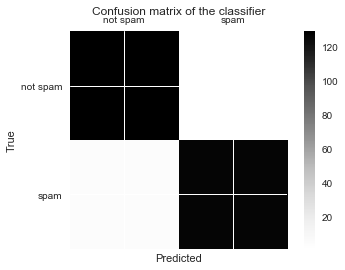

In [41]:
hp.print_cm(cm,['not spam','spam'],plt)